In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["font.family"] = "Arial"
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import numpy as np
from sklearn.neighbors import KDTree

# Treatment result

In this script, I want to smooth the obtained data to see if I can see the tendency of the data more clearly. 
To do that, I will mean the magnetization value with the NN distances. The idea is to perform an operation similar to what smoothing do.  

In [16]:
df = pd.read_csv('RAW_data_Yjunction_interaction.dat', sep ="\t", index = 'index')

TypeError: parser_f() got an unexpected keyword argument 'index'

In [15]:
df


,Unnamed: 0,magnetization,distance,angle
0,0,1.0,12.558169,0
1,0,1.0,98.315595,0
2,1,0.0,203.999134,0
3,2,1.0,30.557449,0
4,3,0.0,138.150374,0
...,...,...,...,...
302,10,0.0,46.941021,90
303,11,0.0,45.778755,90
304,0,1.0,238.381779,90
305,1,0.0,38.375135,90


# RAW data

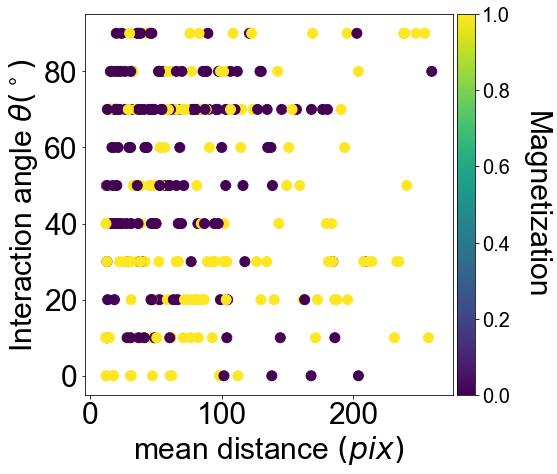

In [9]:
fig, ax1 = plt.subplots(figsize=(7,7))

cm = plt.cm.get_cmap('viridis')

for i, gr in df.groupby('angle'):
    
    C = ax1.scatter(gr.distance,  gr.angle, c =  gr.magnetization, cmap=cm , s = 100)

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
#plt.plot(EXP0.distance, EXP0.angle,'o')

cbar = plt.colorbar(C, cax =cax)
cbar.set_label( 'Magnetization',rotation=270, size = 30, labelpad=40)
cbar.ax.tick_params(labelsize=20)
ax1.set_ylim(-5,95)
ax1.set_xlabel('mean distance $(pix)$', size = 30)
ax1.set_ylabel(r'Interaction angle $\theta (^\circ)$', size = 30)
ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30) 

# ax1.text(380,93 , s = 'AAAA', size = 20)
# ax1.text(380,-6 , s = 'ABAB', size = 20)

# ax1.text(-100,93 , s = 'repulsion', size = 20)
# ax1.text(-100,-6 , s = 'attraction', size = 20)

# ax1.set_xlim(10,100)

# Treatment

In [10]:
df0 = df.set_index('angle')
df1 = df0[['distance']]

In [11]:
data = df1.reset_index()

In [12]:
# Look for the NN 
tree = KDTree(data)
nearest_dist, nearest_ind = tree.query(data, k=3)  # k=2 nearest neighbors where k1 = identity

In [13]:
nearest_ind

array([[  0,   7,  11],
       [  1,   6,  16],
       [  2,  27,  53],
       [  3,  14,  35],
       [  4,  25,  52],
       [  5,  30,  67],
       [  6,   1,  40],
       [  7,   0,  11],
       [  8,  10,  38],
       [  9,  21,  23],
       [ 10,   8,  18],
       [ 11,  13,   0],
       [ 12,   6,  40],
       [ 13,  11,   0],
       [ 14,   3,  35],
       [ 15,  42, 106],
       [ 16,  32,  40],
       [ 17,  35,  24],
       [ 18,  38,  20],
       [ 19,  33,  34],
       [ 20,  38,  18],
       [ 21,  23,  37],
       [ 22,  31,  35],
       [ 23,  37,  21],
       [ 24,  17,  35],
       [ 25,  52,   4],
       [ 26,  29,  31],
       [ 27,  47,  55],
       [ 28,  39,  34],
       [ 29,  26,  31],
       [ 30,  60,   5],
       [ 31,  22,  26],
       [ 32,  43,  54],
       [ 33,  19,  34],
       [ 34,  33,  19],
       [ 35,  17,  24],
       [ 36,  28,  39],
       [ 37,  23,  21],
       [ 38,  20,  18],
       [ 39,  34,  28],
       [ 40,  68,  62],
       [ 41,  43

In [14]:
data.iloc[0], data.iloc[7], data.iloc[16]

(angle        0.000000
 distance    12.558169
 Name: 0, dtype: float64,
 angle        0.000000
 distance    11.972172
 Name: 7, dtype: float64,
 angle       10.000000
 distance    92.886704
 Name: 16, dtype: float64)